### Costa Rican P overty - Social Scheme Distribution

In [1]:
import numpy as np
import pandas as panda
from matplotlib import pyplot as plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
train_data = panda.read_csv('data/train.csv')
train_data.shape

(9557, 143)

In [3]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,9557,9557,ID_7173c12fc,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2a1,2697,NaN,NaN,NaN,165232,150457,0,80000,130000,200000,2.35348e+06
hacdor,9557,NaN,NaN,NaN,0.0380873,0.191417,0,0,0,0,1
rooms,9557,NaN,NaN,NaN,4.95553,1.46838,1,4,5,6,11
hacapo,9557,NaN,NaN,NaN,0.0236476,0.151957,0,0,0,0,1
v14a,9557,NaN,NaN,NaN,0.994768,0.0721453,0,1,1,1,1
refrig,9557,NaN,NaN,NaN,0.957623,0.201459,0,1,1,1,1
v18q,9557,NaN,NaN,NaN,0.231767,0.421983,0,0,0,0,1
v18q1,2215,NaN,NaN,NaN,1.40406,0.763131,1,1,1,2,6
r4h1,9557,NaN,NaN,NaN,0.385895,0.680779,0,0,0,1,5


In [4]:
train_data.columns = [str(i).lower() for i in train_data.columns.tolist()]

We will look at target variable first

In [5]:
train_data['target'].describe().T

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: target, dtype: float64

In [6]:
train_data.target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: target, dtype: int64

In [7]:
train_data.target.isnull().any()

False

In [8]:
np.unique(train_data.target.values),np.bincount(train_data.target.values)

(array([1, 2, 3, 4], dtype=int64),
 array([   0,  755, 1597, 1209, 5996], dtype=int64))

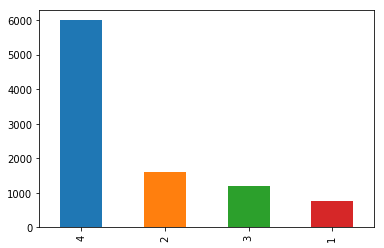

In [9]:
train_data.target.value_counts().plot(kind='bar')

plot.show()

##### Conclusions:

1. Target variable are discrete with values of 1,2,3,4


2. There are no data format mismatches or null data in target variables


3. Target variables are imbalanced. There is a higer frequency of target 4 wrt to others , more than double
    
    
    
From our data dictionary we know the following:

1 = extreme poverty 

2 = moderate poverty 

3 = vulnerable households 

4 = non vulnerable households


<br>
#### Time to look at the other columns, one by one



First lets segregate out the numerical columns and non numerical columns

In [10]:
train_data_dtypes = panda.DataFrame(train_data.dtypes).reset_index()
train_data_dtypes.columns = ['col_name', 'col_type']
train_data_dtypes.head()

,col_name,col_type
0,id,object
1,v2a1,float64
2,hacdor,int64
3,rooms,int64
4,hacapo,int64


In [11]:
train_data_dtypes.col_type.value_counts()

int64      130
float64      8
object       5
Name: col_type, dtype: int64

In [12]:
numerical_columns = train_data_dtypes[train_data_dtypes['col_type'] != np.object]['col_name'].values
non_numerical_columns = [i for i in train_data.columns.tolist() if i not in numerical_columns]
non_numerical_columns

['id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

In [13]:
print('Total Number of numerical columns: ', len(numerical_columns), ' and non numerical columns: ', len(non_numerical_columns))

Total Number of numerical columns:  138  and non numerical columns:  5


In [14]:
train_data[non_numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 5 columns):
id            9557 non-null object
idhogar       9557 non-null object
dependency    9557 non-null object
edjefe        9557 non-null object
edjefa        9557 non-null object
dtypes: object(5)
memory usage: 373.4+ KB


In [15]:
train_data[non_numerical_columns].describe().T

,count,unique,top,freq
id,9557,9557,ID_7173c12fc,1
idhogar,9557,2988,fd8a6d014,13
dependency,9557,31,yes,2192
edjefe,9557,22,no,3762
edjefa,9557,22,no,6230


1. Columns id is just a row identifier , as such we will ignore the same


2. Columns edjefa and edjefe and dependecny are categorical variables. We will rename the columns for ease of use.


3. Check for data mismatch, format errors in the categorical variables and convert them to numerical features 


In [16]:
columns_name_dict = {'edjefe':'male_education_years','edjefa':'female_education_years'}
train_data.rename(columns = columns_name_dict, inplace = True)



In [17]:
non_numerical_columns.extend(columns_name_dict.values())
non_numerical_columns = [i for i in non_numerical_columns if i not in columns_name_dict.keys()]
non_numerical_columns

['id',
 'idhogar',
 'dependency',
 'male_education_years',
 'female_education_years']

In [18]:
train_data[non_numerical_columns].describe().T # we can see that the columns names have been properly updated

,count,unique,top,freq
id,9557,9557,ID_7173c12fc,1
idhogar,9557,2988,fd8a6d014,13
dependency,9557,31,yes,2192
male_education_years,9557,22,no,3762
female_education_years,9557,22,no,6230


In [19]:
#lets check for data mismatches an empty values

train_data.male_education_years.value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: male_education_years, dtype: int64

In [20]:
train_data.male_education_years.isnull().any() # no empty values.

False

In [21]:
# based on our data dictionary value of yes = 1 and no = 0. so we would need to replace the values

train_data['male_education_years']=train_data.male_education_years.apply(lambda x: 1 if x=='yes' else( 0 if x=='no' else x))
train_data.male_education_years.value_counts()

0     3762
6     1845
11     751
9      486
3      307
15     285
8      257
7      234
5      222
14     208
17     202
2      194
4      137
16     134
1      123
12     113
10     111
13     103
21      43
18      19
19      14
20       7
Name: male_education_years, dtype: int64

In [22]:
##similar treatment for female education


train_data['female_education_years']=train_data.female_education_years.apply(lambda x: 1 if x=='yes' else( 0 if x=='no' else x))
train_data.female_education_years.value_counts()

0     6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
14     120
16     113
10      96
2       84
17      76
12      72
1       69
13      52
21       5
19       4
18       3
20       2
Name: female_education_years, dtype: int64

In [23]:
train_data[['female_education_years','male_education_years']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 2 columns):
female_education_years    9557 non-null object
male_education_years      9557 non-null object
dtypes: object(2)
memory usage: 149.4+ KB


In [24]:
## lets convert our male /female education  years to integer values and at the same time add them to
## numerical columns and remove from non numerical columns
train_data['male_education_years'] = train_data['male_education_years'].astype(np.int64)
train_data['female_education_years'] = train_data['female_education_years'].astype(np.int64)

numerical_columns = numerical_columns.tolist()
numerical_columns.extend(['male_education_years','female_education_years'])
non_numerical_columns = [i for i in non_numerical_columns if i not in ['male_education_years','female_education_years']]
non_numerical_columns

['id', 'idhogar', 'dependency']

In [25]:
train_data.dependency.value_counts().head()

yes    2192
no     1747
.5     1497
2       730
1.5     713
Name: dependency, dtype: int64

In [26]:
## we can see that our dependency has yes or no values. however their conversions will not be as simple as male/female
## education years. cehcking in our data dictionary, we can see that another columns SQBdependency has a direct relation with
## dependency column, where SQBdependency = dependency squared
## lets validate this claim


train_data[['dependency','sqbdependency']][train_data['dependency']=='yes']['sqbdependency'].value_counts()


1.0    2192
Name: sqbdependency, dtype: int64

In [27]:
train_data[['dependency','sqbdependency']][train_data['dependency']=='no']['sqbdependency'].value_counts()


0.0    1747
Name: sqbdependency, dtype: int64

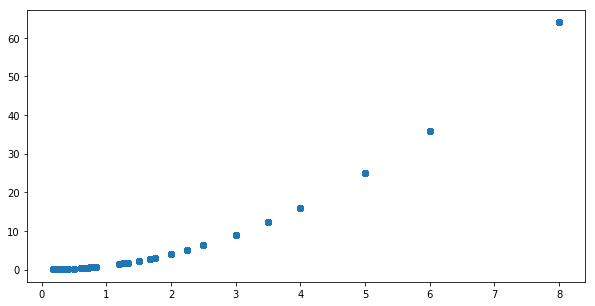

In [28]:
# let check for non yes and non no values and their corresponding values in a line plot to see for squared behavior

temp = train_data.loc[~train_data['dependency'].isin(['yes','no'])]
temp['dependency'] = temp['dependency'].astype(np.float) 
temp['sqbdependency'] = temp['sqbdependency'].astype(np.float) 
# temp[['dependency','sqbdependency']].head()
plot.figure(figsize= (10,5))
plot.scatter(temp.dependency, temp.sqbdependency)
plot.show()

In [29]:
# we can see a clear parabolic relationship and if we look closely there actally is a sqaured relationship.
# based on what is provided in the data dictionary and what we have founf we can safely replace yes with 1 and no with 0
# as we did in case of female and male education years


train_data['dependency']= train_data['dependency'].apply(lambda x: 1 if x =='yes' else (0 if x =='no' else x))
train_data['dependency'] = train_data['dependency'].astype(np.float)


In [30]:
numerical_columns.append('dependency')
non_numerical_columns = [i for i in non_numerical_columns if i not in numerical_columns]

non_numerical_columns

['id', 'idhogar']

In [31]:
train_data[['dependency','male_education_years','female_education_years']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 3 columns):
dependency                9557 non-null float64
male_education_years      9557 non-null int64
female_education_years    9557 non-null int64
dtypes: float64(1), int64(2)
memory usage: 224.1 KB


We are left with only the id columns at the time being. we are going to be working on this later. Lets now tackle the numerical columns one by one. We are going to be checking for:


1. Are any of the numerical columns actually categorical data (other than the ones above which we promoted from string to numerical columns)

2. Are they any missing values in numerical columns

3. Are they any outliers in the numerical columns

4. What is the spread/distribution of the numerical columns

5. How do the numerical columns relate to the target variable

In [32]:
len(numerical_columns)

141

In [33]:
numerical_columns_description = train_data[numerical_columns].describe().T

In [34]:
## since we mucked aroud with a couple of variables and their data types lets check again

train_data_dtypes = panda.DataFrame(train_data.dtypes).reset_index()
train_data_dtypes.columns = ['col_name', 'col_type']
train_data_dtypes.head()

,col_name,col_type
0,id,object
1,v2a1,float64
2,hacdor,int64
3,rooms,int64
4,hacapo,int64


In [35]:
numerical_columns_description.shape,train_data_dtypes.shape

((141, 8), (143, 2))

In [36]:
numerical_columns_description.reset_index(inplace = True)
numerical_columns_description.rename(columns ={'index':'col_name'},inplace = True)


In [37]:
numerical_columns_description.head(2)

,col_name,count,mean,std,min,25%,50%,75%,max
0,v2a1,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0
1,hacdor,9557.0,0.038087,0.191417,0.0,0.0,0.0,0.0,1.0


In [38]:
set(train_data_dtypes.col_name.values.tolist()).difference(set(numerical_columns_description.col_name.values.tolist()))

{'id', 'idhogar'}

In [39]:
numerical_columns_description = panda.merge(numerical_columns_description, train_data_dtypes, how='left', on='col_name')

numerical_columns_description.head(5)

,col_name,count,mean,std,min,25%,50%,75%,max,col_type
0,v2a1,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0,float64
1,hacdor,9557.0,0.038087,0.191417,0.0,0.0,0.0,0.0,1.0,int64
2,rooms,9557.0,4.955530,1.468381,1.0,4.0,5.0,6.0,11.0,int64
3,hacapo,9557.0,0.023648,0.151957,0.0,0.0,0.0,0.0,1.0,int64
4,v14a,9557.0,0.994768,0.072145,0.0,1.0,1.0,1.0,1.0,int64


In [40]:
numerical_columns_description.col_type.value_counts()

## seeing that there are lesser number of float data types , lets deal with those first

int64      132
float64      9
Name: col_type, dtype: int64

In [41]:
numerical_columns_description[numerical_columns_description.col_type==np.float64]

,col_name,count,mean,std,min,25%,50%,75%,max,col_type
0,v2a1,2697.0,165231.606971,150457.133301,0.00,80000.000000,130000.000000,200000.000000,2353477.0,float64
7,v18q1,2215.0,1.404063,0.763131,1.00,1.000000,1.000000,2.000000,6.0,float64
20,rez_esc,1629.0,0.459791,0.946550,0.00,0.000000,0.000000,1.000000,5.0,float64
98,meaneduc,9552.0,9.231523,4.167694,0.00,6.000000,9.000000,11.600000,37.0,float64
109,overcrowding,9557.0,1.605380,0.819946,0.20,1.000000,1.500000,2.000000,6.0,float64
133,sqbovercrowding,9557.0,3.249485,4.129547,0.04,1.000000,2.250000,4.000000,36.0,float64
134,sqbdependency,9557.0,3.900409,12.511831,0.00,0.111111,0.444444,1.777778,64.0,float64
135,sqbmeaned,9552.0,102.588867,93.516890,0.00,36.000000,81.000000,134.560010,1369.0,float64
140,dependency,9557.0,1.149550,1.605993,0.00,0.333333,0.666667,1.333333,8.0,float64


In [49]:
# columns such as v18q1,rez_esc, seems to be categorical data. 

train_data.v18q1.isnull().sum(),train_data.rez_esc.isnull().sum(),

(7342, 7928)

In [52]:


train_data['v18q1'].value_counts()

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [45]:
train_data['rez_esc'].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [66]:
## We can notice there are significant number of missing values in both categorical data
# lets chek their meanings in the data dictionary and if we can discern a way to replace the missing values using domain knowldege

# v18q, owns a tablet
# v18q1, number of tablets household owns
# lets check for the relationship when v18q1 is empty

train_data[['v18q','v18q1']][train_data['v18q1'].isna()].T


,0,2,7,8,9,10,11,12,15,16,...,9547,9548,9549,9550,9551,9552,9553,9554,9555,9556
v18q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v18q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
train_data[['v18q','v18q1']].loc[train_data['v18q1'].isna() & train_data['v18q']==0].T

,0,1,2,3,4,5,6,7,8,9,...,9547,9548,9549,9550,9551,9552,9553,9554,9555,9556
v18q,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v18q1,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
train_data[['v18q','v18q1']].loc[train_data['v18q1'].isna() & train_data['v18q']==1].T

""
v18q
v18q1


In [69]:
train_data[['v18q','v18q1']].loc[train_data['v18q']==1].T

,1,3,4,5,6,13,14,27,28,29,...,9274,9275,9401,9402,9403,9504,9505,9516,9517,9518
v18q,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
v18q1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [72]:
#lets confirm our hypothesis that v18q1 is NaN only when there are no tablets that the household is using by comparing counts


train_data['v18q1'][train_data.v18q1.isna()].shape, train_data['v18q'][train_data.v18q==0].shape

((7342,), (7342,))

In [73]:
# perfect our hypothesis is proved and we can go ahead and replace v18q1 NaN with a value of 0
train_data['v18q1'].fillna(value = 0, inplace = True)
train_data.v18q1.isnull().sum()

0

In [74]:
# while we are at it, we will also replace the column names as well for better understanding.

columns_name_dict = {'v18q1':'num_of_tablets','v18q':'tablet_owner'}
train_data.rename(columns = columns_name_dict, inplace = True)

In [77]:
# escolari, years of schooling
# rez_esc, Years behind in school

train_data[['escolari','rez_esc']][train_data.rez_esc.isna()].T


,0,1,2,4,5,8,9,11,12,13,...,9547,9548,9549,9550,9551,9552,9553,9554,9555,9556
escolari,10.0,12.0,11.0,11.0,11.0,9.0,11.0,12.0,11.0,4.0,...,11.0,11.0,0.0,6.0,0.0,9.0,0.0,5.0,11.0,8.0
rez_esc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:

train_data[['escolari','rez_esc']][~train_data.rez_esc.isna()].T


,3,6,7,10,38,42,48,50,52,54,...,9479,9491,9493,9497,9514,9516,9533,9536,9542,9543
escolari,9.0,2.0,0.0,3.0,8.0,8.0,2.0,2.0,8.0,6.0,...,2.0,6.0,1.0,3.0,1.0,6.0,10.0,0.0,3.0,6.0
rez_esc,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
train_data[['escolari','rez_esc']][train_data.escolari==21].T

,210,296,386,558,563,644,1016,1852,2213,2321,...,2724,3598,4140,4334,4552,4736,5321,7153,7952,7956
escolari,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
rez_esc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# there is no clear pattern emerging, so this is what we are going to do
# 1. we are going to create a new column with nan replaced with mean of the data
# 2. we are going to create another column with nan replaced with max appearing value

mean = train_data.rez_esc.mean()
most_appearing = train_data.rez_esc.value_counts().idxmax()
most_appearing,round(mean,2)


(0.0, 0.46)

In [90]:
train_data['yrs_behind_in_school_nan_with_max_appearing'] = train_data['rez_esc']
train_data['yrs_behind_in_school_nan_with_max_appearing'].fillna(value = most_appearing, inplace=True)

train_data.yrs_behind_in_school_nan_with_max_appearing.isnull().sum()

0

In [94]:
train_data['yrs_behind_in_school_nan_with_mean'] = train_data['rez_esc']
train_data['yrs_behind_in_school_nan_with_mean'].fillna(value = round(mean,2), inplace=True)

train_data.yrs_behind_in_school_nan_with_mean.isnull().sum()

0

In [95]:
numerical_columns.append('yrs_behind_in_school_nan_with_mean')
numerical_columns.append('yrs_behind_in_school_nan_with_max_appearing')

In [96]:
train_data.yrs_behind_in_school_nan_with_max_appearing.value_counts()

0.0    9139
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: yrs_behind_in_school_nan_with_max_appearing, dtype: int64

In [97]:
train_data.yrs_behind_in_school_nan_with_mean.value_counts()

0.46    7928
0.00    1211
1.00     227
2.00      98
3.00      55
4.00      29
5.00       9
Name: yrs_behind_in_school_nan_with_mean, dtype: int64

In [102]:
train_data.num_of_tablets.value_counts()

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: num_of_tablets, dtype: int64

In [99]:
train_data.tablet_owner.value_counts()

0    7342
1    2215
Name: tablet_owner, dtype: int64

In [ ]:
# ## all the above columns would need to undergo categorical encoding. so lets mark them as such.

# require_encoding = ['tablet_owner',
#                     'num_of_tablets',
#                     'yrs_behind_in_school_nan_with_max_appearing',
#                     'yrs_behind_in_school_nan_with_mean']

In [103]:
train_data.v2a1.isnull().sum()

6860

In [104]:
train_data.v2a1.value_counts()

150000.0     233
100000.0     181
200000.0     159
120000.0     149
50000.0      118
80000.0      104
90000.0       81
70000.0       79
180000.0      77
300000.0      76
250000.0      75
40000.0       72
60000.0       57
130000.0      53
350000.0      53
110000.0      53
30000.0       48
160000.0      46
170000.0      41
140000.0      39
220000.0      30
0.0           29
570540.0      25
45000.0       25
175000.0      23
400000.0      22
20000.0       22
25000.0       21
285270.0      21
35000.0       20
            ... 
176000.0       2
420000.0       2
52000.0        2
100297.0       2
155000.0       2
159751.0       2
102000.0       2
58731.0        2
278000.0       2
32600.0        2
470000.0       2
2353477.0      2
44000.0        2
93000.0        2
275000.0       2
288750.0       2
325000.0       2
16000.0        2
219087.0       2
234000.0       1
249896.0       1
125518.0       1
25310.0        1
510000.0       1
253000.0       1
119813.0       1
268153.0       1
542013.0      

In [106]:
# since v2a1 is rent paidn in month, we are not goinf to be replacing it with the max  rent. since that will move those 
# households to a copletely different category which we dont want
# instead we are goinf to be replacing it with mean of the rent paid in months.
# however we are only goiung to be doing the same for households which are actualyl rented.
# for non rented households we are going to be replacing it with 0
# also rename the column at the same time


columns_name_dict['v2a1']='monthly_rent_paid'
train_data.rename(columns = columns_name_dict, inplace='True')


In [121]:

# are they any households which are rented and at the same time have no values for the monthly rent paid??
train_data[['tipovivi3','monthly_rent_paid']].loc[(train_data['tipovivi3']==1) & train_data.monthly_rent_paid.isna()]

,tipovivi3,monthly_rent_paid


In [122]:
# since there are no households which are rented but do not have value for monthly rent paid
# we can safely assume that nan values in monthly rent paid column is =beacuse that particular household is not 
# rented. we will replace nan with a value of 0

train_data['monthly_rent_paid'].fillna(value = 0 , inplace = True)

In [123]:
train_data.meaneduc.isnull().sum()

5

In [128]:
train_data['instlevel1'].value_counts(), train_data['instlevel1'].isnull().sum()

(0    8270
 1    1287
 Name: instlevel1, dtype: int64, 0)

In [133]:
# lets check if any of the mean education with nan values are because there is 0 yrs of education 
# in which case we can saefly replace the nan with 0 values
# 0 yrs of education is instlevel1 = 1


# we can see below that our hypothesis proved incorrect. there are empty meaneduc values for folks who have 
# completed some years of education

train_data[['meaneduc','instlevel1']].loc[train_data.meaneduc.isna() & train_data['instlevel1']==1]

,meaneduc,instlevel1


In [135]:
# lets check if any of the mean education with nan values are because there is incomplete primary education
# in which case we can saefly replace the nan with 0 values
# imcplete primary education is instlevel2 = 1



train_data[['meaneduc','instlevel2']].loc[train_data.meaneduc.isna() & train_data['instlevel2']==1]

,meaneduc,instlevel2
1841,NaN,1


In [ ]:
## from google we saw that costa rica has 6 yrs of primary education. so for the above data we are going to assign 
## a mid value of education = 3

In [163]:

# lets check if any of the mean education with nan values are because there is complete primary education
# in which case we can saefly replace the nan with 0 values
# cplete primary education is instlevel3 = 1

train_data[['meaneduc','instlevel3']].loc[train_data.meaneduc.isna() & train_data['instlevel3']==1]

,meaneduc,instlevel3
1840,NaN,1


In [169]:

# lets check if any of the mean education with nan values are because there is incomplete secondary education
# in which case we can saefly replace the nan with 0 values incplete secondary education is instlevel4 = 1

train_data[['meaneduc','instlevel4']].loc[train_data.meaneduc.isna() & train_data['instlevel4']==1]

,meaneduc,instlevel4
1291,NaN,1


In [170]:

# lets check if any of the mean education with nan values are because there is complete secondary education
# in which case we can saefly replace the nan with 0 values cplete secondary education is instlevel5 = 1


train_data[['meaneduc','instlevel5']].loc[train_data.meaneduc.isna() & train_data['instlevel5']==1]

,meaneduc,instlevel5


In [171]:

# lets check if any of the mean education with nan values are because there is incomplete tech secondary education
# in which case we can saefly replace the nan with 0 values ncomplete tech secondary education is instlevel6 = 1


train_data[['meaneduc','instlevel6']].loc[train_data.meaneduc.isna() & train_data['instlevel6']==1]

,meaneduc,instlevel6


In [172]:

# lets check if any of the mean education with nan values are because there is complete tech secondary education
# in which case we can saefly replace the nan with 0 values complete tech secondary education is instlevel7 = 1


train_data[['meaneduc','instlevel7']].loc[train_data.meaneduc.isna() & train_data['instlevel7']==1]

,meaneduc,instlevel7
2049,NaN,1
2050,NaN,1


In [ ]:
# we have found all our 5 missing meaneduc rows and we know what values to replace each with
# 1840= 6
# 1841 = 3
# 1291 = 2 + 6
# 2049 = 3+6+3
# 2050 = 3+6+3

In [175]:
train_data['meaneduc'].fillna(value = -99999, inplace = True) # fillinf with crazy values so that later on i can do replace

In [180]:
train_data.iloc[1840]['meaneduc'],train_data.iloc[1841]['meaneduc'],train_data.iloc[1291]['meaneduc']

(-99999.0, -99999.0, -99999.0)

In [191]:
train_data.loc[1840,'meaneduc'] =6
train_data.loc[1841,'meaneduc'] = 3
train_data.loc[1291,'meaneduc'] = 8
train_data.loc[2049,'meaneduc'] = 12
train_data.loc[2050,'meaneduc'] = 12

In [194]:
train_data.meaneduc.isna().sum()

0

In [201]:
# moving on to columns overcrowding and sqbovercrowding and sqbmeaned

train_data[['sqbmeaned','sqbovercrowding','overcrowding','dependency','sqbdependency']].isnull().sum()

sqbmeaned          5
sqbovercrowding    0
overcrowding       0
dependency         0
sqbdependency      0
dtype: int64

In [205]:
# we know sqbmeaned is the square value of meaneduc so we can simply chek in those row number
train_data.iloc[[1291,1840,1841,2049,2050]]['sqbmeaned']

1291   NaN
1840   NaN
1841   NaN
2049   NaN
2050   NaN
Name: sqbmeaned, dtype: float64

In [206]:
train_data.loc[1840,'meaneduc'] =6**2
train_data.loc[1841,'meaneduc'] = 3**2
train_data.loc[1291,'meaneduc'] = 8**2
train_data.loc[2049,'meaneduc'] = 12**2
train_data.loc[2050,'meaneduc'] = 12**2

#### At this point, we are done dealing with the float data types for numerical columns
#### Lets tackle the int values one by one based on categorization already provided in the data dictionary

In [217]:
# tipovivi1, =1 own and fully paid house
# tipovivi2, "=1 own,  paying in installments"
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, "=1 other(assigned,  borrowed)"

print(set(train_data.tipovivi1.values.tolist()),np.bincount(train_data.tipovivi1.values))
print(set(train_data.tipovivi2.values.tolist()),np.bincount(train_data.tipovivi2.values))
print(set(train_data.tipovivi3.values.tolist()),np.bincount(train_data.tipovivi3.values))
print(set(train_data.tipovivi4.values.tolist()),np.bincount(train_data.tipovivi4.values))
print(set(train_data.tipovivi5.values.tolist()),np.bincount(train_data.tipovivi5.values))
print('\n any null values:',train_data[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']].isnull().sum())

{0, 1} [3646 5911]
{0, 1} [8596  961]
{0, 1} [7821 1736]
{0, 1} [9394  163]
{0, 1} [8771  786]

 any null values: tipovivi1    0
tipovivi2    0
tipovivi3    0
tipovivi4    0
tipovivi5    0
dtype: int64


In [219]:
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary
# instlevel3, =1 complete primary
# instlevel4, =1 incomplete academic secondary level
# instlevel5, =1 complete academic secondary level
# instlevel6, =1 incomplete technical secondary level
# instlevel7, =1 complete technical secondary level
# instlevel8, =1 undergraduate and higher education
# instlevel9, =1 postgraduate higher education

print(set(train_data.instlevel1.values.tolist()),np.bincount(train_data.instlevel1.values))
print(set(train_data.instlevel2.values.tolist()),np.bincount(train_data.instlevel2.values))
print(set(train_data.instlevel3.values.tolist()),np.bincount(train_data.instlevel3.values))
print(set(train_data.instlevel4.values.tolist()),np.bincount(train_data.instlevel4.values))
print(set(train_data.instlevel5.values.tolist()),np.bincount(train_data.instlevel5.values))
print(set(train_data.instlevel6.values.tolist()),np.bincount(train_data.instlevel6.values))
print(set(train_data.instlevel7.values.tolist()),np.bincount(train_data.instlevel7.values))
print(set(train_data.instlevel8.values.tolist()),np.bincount(train_data.instlevel8.values))
print(set(train_data.instlevel9.values.tolist()),np.bincount(train_data.instlevel9.values))
print('\n any null values:',train_data[['instlevel1',\
                                        'instlevel2',\
                                        'instlevel3',\
                                        'instlevel4',\
                                        'instlevel5',\
                                        'instlevel6',\
                                        'instlevel7',\
                                        'instlevel8',\
                                        'instlevel9']].isnull().sum())

{0, 1} [8270 1287]
{0, 1} [7927 1630]
{0, 1} [7572 1985]
{0, 1} [7785 1772]
{0, 1} [8480 1077]
{0, 1} [9386  171]
{0, 1} [9408  149]
{0, 1} [8221 1336]
{0, 1} [9410  147]

 any null values: instlevel1    0
instlevel2    0
instlevel3    0
instlevel4    0
instlevel5    0
instlevel6    0
instlevel7    0
instlevel8    0
instlevel9    0
dtype: int64


In [220]:
# parentesco1, =1 if household head
# parentesco2, =1 if spouse/partner
# parentesco3, =1 if son/doughter
# parentesco4, =1 if stepson/doughter
# parentesco5, =1 if son/doughter in law
# parentesco6, =1 if grandson/doughter
# parentesco7, =1 if mother/father
# parentesco8, =1 if father/mother in law
# parentesco9, =1 if brother/sister
# parentesco10, =1 if brother/sister in law
# parentesco11, =1 if other family member
# parentesco12, =1 if other non family member

print(set(train_data.parentesco1.values.tolist()),np.bincount(train_data.parentesco1.values))
print(set(train_data.parentesco2.values.tolist()),np.bincount(train_data.parentesco2.values))
print(set(train_data.parentesco3.values.tolist()),np.bincount(train_data.parentesco3.values))
print(set(train_data.parentesco4.values.tolist()),np.bincount(train_data.parentesco4.values))
print(set(train_data.parentesco5.values.tolist()),np.bincount(train_data.parentesco5.values))
print(set(train_data.parentesco6.values.tolist()),np.bincount(train_data.parentesco6.values))
print(set(train_data.parentesco7.values.tolist()),np.bincount(train_data.parentesco7.values))
print(set(train_data.parentesco8.values.tolist()),np.bincount(train_data.parentesco8.values))
print(set(train_data.parentesco9.values.tolist()),np.bincount(train_data.parentesco9.values))
print(set(train_data.parentesco10.values.tolist()),np.bincount(train_data.parentesco10.values))
print(set(train_data.parentesco11.values.tolist()),np.bincount(train_data.parentesco11.values))
print(set(train_data.parentesco12.values.tolist()),np.bincount(train_data.parentesco12.values))
print('\n any null values:',train_data[['parentesco1',\
                                        'parentesco2',\
                                        'parentesco3',\
                                        'parentesco4',\
                                        'parentesco5',\
                                        'parentesco6',\
                                        'parentesco7',\
                                        'parentesco8',\
                                        'parentesco9',\
                                        'parentesco10',\
                                        'parentesco11',\
                                        'parentesco12']].isnull().sum())

{0, 1} [6584 2973]
{0, 1} [7798 1759]
{0, 1} [5908 3649]
{0, 1} [9441  116]
{0, 1} [9466   91]
{0, 1} [9068  489]
{0, 1} [9461   96]
{0, 1} [9534   23]
{0, 1} [9430  127]
{0, 1} [9527   30]
{0, 1} [9436  121]
{0, 1} [9474   83]

 any null values: parentesco1     0
parentesco2     0
parentesco3     0
parentesco4     0
parentesco5     0
parentesco6     0
parentesco7     0
parentesco8     0
parentesco9     0
parentesco10    0
parentesco11    0
parentesco12    0
dtype: int64


In [220]:
# parentesco1, =1 if household head
# parentesco2, =1 if spouse/partner
# parentesco3, =1 if son/doughter
# parentesco4, =1 if stepson/doughter
# parentesco5, =1 if son/doughter in law
# parentesco6, =1 if grandson/doughter
# parentesco7, =1 if mother/father
# parentesco8, =1 if father/mother in law
# parentesco9, =1 if brother/sister
# parentesco10, =1 if brother/sister in law
# parentesco11, =1 if other family member
# parentesco12, =1 if other non family member

print(set(train_data.parentesco1.values.tolist()),np.bincount(train_data.parentesco1.values))
print(set(train_data.parentesco2.values.tolist()),np.bincount(train_data.parentesco2.values))
print(set(train_data.parentesco3.values.tolist()),np.bincount(train_data.parentesco3.values))
print(set(train_data.parentesco4.values.tolist()),np.bincount(train_data.parentesco4.values))
print(set(train_data.parentesco5.values.tolist()),np.bincount(train_data.parentesco5.values))
print(set(train_data.parentesco6.values.tolist()),np.bincount(train_data.parentesco6.values))
print(set(train_data.parentesco7.values.tolist()),np.bincount(train_data.parentesco7.values))
print(set(train_data.parentesco8.values.tolist()),np.bincount(train_data.parentesco8.values))
print(set(train_data.parentesco9.values.tolist()),np.bincount(train_data.parentesco9.values))
print(set(train_data.parentesco10.values.tolist()),np.bincount(train_data.parentesco10.values))
print(set(train_data.parentesco11.values.tolist()),np.bincount(train_data.parentesco11.values))
print(set(train_data.parentesco12.values.tolist()),np.bincount(train_data.parentesco12.values))
print('\n any null values:',train_data[['parentesco1',\
                                        'parentesco2',\
                                        'parentesco3',\
                                        'parentesco4',\
                                        'parentesco5',\
                                        'parentesco6',\
                                        'parentesco7',\
                                        'parentesco8',\
                                        'parentesco9',\
                                        'parentesco10',\
                                        'parentesco11',\
                                        'parentesco12']].isnull().sum())

{0, 1} [6584 2973]
{0, 1} [7798 1759]
{0, 1} [5908 3649]
{0, 1} [9441  116]
{0, 1} [9466   91]
{0, 1} [9068  489]
{0, 1} [9461   96]
{0, 1} [9534   23]
{0, 1} [9430  127]
{0, 1} [9527   30]
{0, 1} [9436  121]
{0, 1} [9474   83]

 any null values: parentesco1     0
parentesco2     0
parentesco3     0
parentesco4     0
parentesco5     0
parentesco6     0
parentesco7     0
parentesco8     0
parentesco9     0
parentesco10    0
parentesco11    0
parentesco12    0
dtype: int64


In [222]:
# estadocivil1, =1 if less than 10 years old
# estadocivil2, =1 if free or coupled uunion
# estadocivil3, =1 if married
# estadocivil4, =1 if divorced
# estadocivil5, =1 if separated
# estadocivil6, =1 if widow/er
# estadocivil7, =1 if single

print(set(train_data.estadocivil1.values.tolist()),np.bincount(train_data.estadocivil1.values))
print(set(train_data.estadocivil2.values.tolist()),np.bincount(train_data.estadocivil2.values))
print(set(train_data.estadocivil3.values.tolist()),np.bincount(train_data.estadocivil3.values))
print(set(train_data.estadocivil4.values.tolist()),np.bincount(train_data.estadocivil4.values))
print(set(train_data.estadocivil5.values.tolist()),np.bincount(train_data.estadocivil5.values))
print(set(train_data.estadocivil6.values.tolist()),np.bincount(train_data.estadocivil6.values))
print(set(train_data.estadocivil7.values.tolist()),np.bincount(train_data.estadocivil7.values))
print('\n any null values:',train_data[['estadocivil1',\
                                        'estadocivil2',\
                                        'estadocivil3',\
                                        'estadocivil4',\
                                        'estadocivil5',\
                                        'estadocivil6',\
                                        'estadocivil7']].isnull().sum())

{0, 1} [8240 1317]
{0, 1} [8379 1178]
{0, 1} [6992 2565]
{0, 1} [9252  305]
{0, 1} [8957  600]
{0, 1} [9240  317]
{0, 1} [6282 3275]

 any null values: estadocivil1    0
estadocivil2    0
estadocivil3    0
estadocivil4    0
estadocivil5    0
estadocivil6    0
estadocivil7    0
dtype: int64


In [223]:
# eviv1, =1 if floor are bad
# eviv2, =1 if floor are regular
# eviv3, =1 if floor are good

print(set(train_data.eviv1.values.tolist()),np.bincount(train_data.eviv1.values))
print(set(train_data.eviv2.values.tolist()),np.bincount(train_data.eviv2.values))
print(set(train_data.eviv3.values.tolist()),np.bincount(train_data.eviv3.values))
print('\n any null values:',train_data[['eviv1',\
                                        'eviv2',\
                                        'eviv3']].isnull().sum())

{0, 1} [8591  966]
{0, 1} [7141 2416]
{0, 1} [3382 6175]

 any null values: eviv1    0
eviv2    0
eviv3    0
dtype: int64


In [225]:
# sanitario1, =1 no toilet in the dwelling
# sanitario2, =1 toilet connected to sewer or cesspool
# sanitario3, =1 toilet connected to  septic tank
# sanitario5, =1 toilet connected to black hole or letrine
# sanitario6, =1 toilet connected to other system

print(set(train_data.sanitario1.values.tolist()),np.bincount(train_data.sanitario1.values))
print(set(train_data.sanitario2.values.tolist()),np.bincount(train_data.sanitario2.values))
print(set(train_data.sanitario3.values.tolist()),np.bincount(train_data.sanitario3.values))
print(set(train_data.sanitario5.values.tolist()),np.bincount(train_data.sanitario5.values))
print(set(train_data.sanitario6.values.tolist()),np.bincount(train_data.sanitario6.values))
print('\n any null values:',train_data[['sanitario1',\
                                        'sanitario2',\
                                        'sanitario3',\
                                        'sanitario5',\
                                        'sanitario6']].isnull().sum())

{0, 1} [9520   37]
{0, 1} [7512 2045]
{0, 1} [2253 7304]
{0, 1} [9410  147]
{0, 1} [9533   24]

 any null values: sanitario1    0
sanitario2    0
sanitario3    0
sanitario5    0
sanitario6    0
dtype: int64


In [226]:
# etecho1, =1 if roof are bad
# etecho2, =1 if roof are regular
# etecho3, =1 if roof are good

print(set(train_data.etecho1.values.tolist()),np.bincount(train_data.etecho1.values))
print(set(train_data.etecho2.values.tolist()),np.bincount(train_data.etecho2.values))
print(set(train_data.etecho3.values.tolist()),np.bincount(train_data.etecho3.values))
print('\n any null values:',train_data[['etecho1',\
                                        'etecho2',\
                                        'etecho3']].isnull().sum())

{0, 1} [8330 1227]
{0, 1} [6804 2753]
{0, 1} [3980 5577]

 any null values: etecho1    0
etecho2    0
etecho3    0
dtype: int64


In [227]:
# epared1, =1 if walls are bad
# epared2, =1 if walls are regular
# epared3, =1 if walls are good

print(set(train_data.epared1.values.tolist()),np.bincount(train_data.epared1.values))
print(set(train_data.epared2.values.tolist()),np.bincount(train_data.epared2.values))
print(set(train_data.epared3.values.tolist()),np.bincount(train_data.epared3.values))
print('\n any null values:',train_data[['epared1',\
                                        'epared2',\
                                        'epared3']].isnull().sum())

{0, 1} [8578  979]
{0, 1} [6428 3129]
{0, 1} [4108 5449]

 any null values: epared1    0
epared2    0
epared3    0
dtype: int64


In [228]:
# elimbasu1, =1 if rubbish disposal mainly by tanker truck
# elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
# elimbasu3, =1 if rubbish disposal mainly by burning
# elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
# elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
# elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
# elimbasu6, =1 if rubbish disposal mainly other

print(set(train_data.elimbasu1.values.tolist()),np.bincount(train_data.elimbasu1.values))
print(set(train_data.elimbasu2.values.tolist()),np.bincount(train_data.elimbasu2.values))
print(set(train_data.elimbasu3.values.tolist()),np.bincount(train_data.elimbasu3.values))
print(set(train_data.elimbasu4.values.tolist()),np.bincount(train_data.elimbasu4.values))
print(set(train_data.elimbasu5.values.tolist()),np.bincount(train_data.elimbasu5.values))
print(set(train_data.elimbasu6.values.tolist()),np.bincount(train_data.elimbasu6.values))


print('\n any null values:',train_data[['elimbasu1',\
                                        'elimbasu2',\
                                        'elimbasu3',\
                                        'elimbasu4',\
                                        'elimbasu5',\
                                        'elimbasu6']].isnull().sum())

{0, 1} [1121 8436]
{0, 1} [9270  287]
{0, 1} [8749  808]
{0, 1} [9543   14]
{0} [9557]
{0, 1} [9545   12]

 any null values: elimbasu1    0
elimbasu2    0
elimbasu3    0
elimbasu4    0
elimbasu5    0
elimbasu6    0
dtype: int64


In [229]:
# energcocinar1, =1 no main source of energy used for cooking (no kitchen)
# energcocinar2, =1 main source of energy used for cooking electricity
# energcocinar3, =1 main source of energy used for cooking gas
# energcocinar4, =1 main source of energy used for cooking wood charcoal

print(set(train_data.energcocinar1.values.tolist()),np.bincount(train_data.energcocinar1.values))
print(set(train_data.energcocinar2.values.tolist()),np.bincount(train_data.energcocinar2.values))
print(set(train_data.energcocinar3.values.tolist()),np.bincount(train_data.energcocinar3.values))
print(set(train_data.energcocinar4.values.tolist()),np.bincount(train_data.energcocinar4.values))



print('\n any null values:',train_data[['energcocinar1',\
                                        'energcocinar2',\
                                        'energcocinar3',\
                                        'energcocinar4']].isnull().sum())

{0, 1} [9539   18]
{0, 1} [4878 4679]
{0, 1} [5176 4381]
{0, 1} [9078  479]

 any null values: energcocinar1    0
energcocinar2    0
energcocinar3    0
energcocinar4    0
dtype: int64


In [247]:
# paredblolad, =1 if predominant material on the outside wall is block or brick
# paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
# paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
# pareddes, =1 if predominant material on the outside wall is waste material
# paredmad, =1 if predominant material on the outside wall is wood
# paredzinc, =1 if predominant material on the outside wall is zink
# paredfibras, =1 if predominant material on the outside wall is natural fibers
# paredother, =1 if predominant material on the outside wall is other
# pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
# pisocemento, =1 if predominant material on the floor is cement
# pisoother, =1 if predominant material on the floor is other
# pisonatur, =1 if predominant material on the floor is  natural material
# pisonotiene, =1 if no floor at the household
# pisomadera, =1 if predominant material on the floor is wood
# techozinc, =1 if predominant material on the roof is metal foil or zink
# techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
# techocane, =1 if predominant material on the roof is natural fibers
# techootro, =1 if predominant material on the roof is other
# cielorazo, =1 if the house has ceiling
# abastaguadentro, =1 if water provision inside the dwelling
# abastaguafuera, =1 if water provision outside the dwelling
# abastaguano, =1 if no water provision
# public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
# planpri, =1 electricity from private plant
# noelec, =1 no electricity in the dwelling
# coopele, =1 electricity from cooperative

print(set(train_data.coopele.values.tolist()),np.bincount(train_data.coopele.values))
print(set(train_data.noelec.values.tolist()),np.bincount(train_data.noelec.values))
print(set(train_data.planpri.values.tolist()),np.bincount(train_data.planpri.values))
print(set(train_data.public.values.tolist()),np.bincount(train_data.public.values))
print(set(train_data.abastaguano.values.tolist()),np.bincount(train_data.abastaguano.values))
print(set(train_data.abastaguafuera.values.tolist()),np.bincount(train_data.abastaguafuera.values))
print(set(train_data.abastaguadentro.values.tolist()),np.bincount(train_data.abastaguadentro.values))
print(set(train_data.cielorazo.values.tolist()),np.bincount(train_data.cielorazo.values))
print(set(train_data.techootro.values.tolist()),np.bincount(train_data.techootro.values))
print(set(train_data.techocane.values.tolist()),np.bincount(train_data.techocane.values))
print(set(train_data.techoentrepiso.values.tolist()),np.bincount(train_data.techoentrepiso.values))
print(set(train_data.techozinc.values.tolist()),np.bincount(train_data.techozinc.values))
print(set(train_data.pisomadera.values.tolist()),np.bincount(train_data.pisomadera.values))
print(set(train_data.pisonotiene.values.tolist()),np.bincount(train_data.pisonotiene.values))
print(set(train_data.pisonatur.values.tolist()),np.bincount(train_data.pisonatur.values))
print(set(train_data.pisoother.values.tolist()),np.bincount(train_data.pisoother.values))
print(set(train_data.pisocemento.values.tolist()),np.bincount(train_data.pisocemento.values))
print(set(train_data.pisomoscer.values.tolist()),np.bincount(train_data.pisomoscer.values))
print(set(train_data.paredother.values.tolist()),np.bincount(train_data.paredother.values))
print(set(train_data.paredfibras.values.tolist()),np.bincount(train_data.paredfibras.values))

print(set(train_data.paredzinc.values.tolist()),np.bincount(train_data.paredzinc.values))
print(set(train_data.paredmad.values.tolist()),np.bincount(train_data.paredmad.values))
print(set(train_data.pareddes.values.tolist()),np.bincount(train_data.pareddes.values))
print(set(train_data.paredpreb.values.tolist()),np.bincount(train_data.paredpreb.values))
print(set(train_data.paredzocalo.values.tolist()),np.bincount(train_data.paredzocalo.values))
print(set(train_data.paredblolad.values.tolist()),np.bincount(train_data.paredblolad.values))


print(set(train_data.hacdor.values.tolist()),np.bincount(train_data.hacdor.values))
print(set(train_data.hacapo.values.tolist()),np.bincount(train_data.hacapo.values))
print(set(train_data.v14a.values.tolist()),np.bincount(train_data.v14a.values))
print(set(train_data.refrig.values.tolist()),np.bincount(train_data.refrig.values))


print(set(train_data.lugar1.values.tolist()),np.bincount(train_data.lugar1.values))
print(set(train_data.lugar2.values.tolist()),np.bincount(train_data.lugar2.values))
print(set(train_data.lugar3.values.tolist()),np.bincount(train_data.lugar3.values))
print(set(train_data.lugar4.values.tolist()),np.bincount(train_data.lugar4.values))
print(set(train_data.lugar5.values.tolist()),np.bincount(train_data.lugar5.values))
print(set(train_data.lugar6.values.tolist()),np.bincount(train_data.lugar6.values))


print(set(train_data.area1.values.tolist()),np.bincount(train_data.area1.values))
print(set(train_data.area2.values.tolist()),np.bincount(train_data.area2.values))

cat_columns = [
    
    'area1',
    'area2',    
    'lugar6',
    'lugar5',
    'lugar4',
    'lugar3',
    'lugar2',
    'lugar1',    
    'refrig',
    'v14a',
    'hacapo',
    'hacdor',    
    'paredblolad',
    'paredzocalo',
    'paredpreb',
    'pareddes',
    'paredmad',
    'paredzinc',   
    'paredfibras',
    'paredother',
    'pisomoscer',
    'pisocemento',
    'pisoother',
    'pisonatur',
    'pisonotiene',
    'pisomadera',
    'techozinc',
    'techoentrepiso',
    'techocane',
    'techootro',
    
    'cielorazo',
    'abastaguadentro',
    'abastaguafuera',
    'abastaguano',
    'public',
    'planpri',
    'noelec',
    'coopele',
]
print('\n any null values:',train_data[cat_columns].isnull().sum())

{0, 1} [8498 1059]
{0, 1} [9536   21]
{0, 1} [9554    3]
{0, 1} [1098 8459]
{0, 1} [9523   34]
{0, 1} [9254  303]
{0, 1} [ 337 9220]
{0, 1} [3083 6474]
{0, 1} [9536   21]
{0, 1} [9527   30]
{0, 1} [9388  169]
{0, 1} [ 286 9271]
{0, 1} [8927  630]
{0, 1} [9400  157]
{0, 1} [9547   10]
{0, 1} [9548    9]
{0, 1} [7427 2130]
{0, 1} [2936 6621]
{0, 1} [9543   14]
{0, 1} [9543   14]
{0, 1} [9432  125]
{0, 1} [8452 1105]
{0, 1} [9475   82]
{0, 1} [7760 1797]
{0, 1} [8814  743]
{0, 1} [3880 5677]
{0, 1} [9193  364]
{0, 1} [9331  226]
{0, 1} [  50 9507]
{0, 1} [ 405 9152]
{0, 1} [3941 5616]
{0, 1} [8671  886]
{0, 1} [8961  596]
{0, 1} [8766  791]
{0, 1} [8660  897]
{0, 1} [8786  771]
{0, 1} [2728 6829]
{0, 1} [6829 2728]

 any null values: area1              0
area2              0
lugar6             0
lugar5             0
lugar4             0
lugar3             0
lugar2             0
lugar1             0
refrig             0
v14a               0
hacapo             0
hacdor             0
paredbl

In [252]:
# r4h1, Males younger than 12 years of age
# r4h2, Males 12 years of age and older
# r4h3, Total males in the household
# r4m1, Females younger than 12 years of age
# r4m2, Females 12 years of age and older
# r4m3, Total females in the household
# r4t1, persons younger than 12 years of age
# r4t2, persons 12 years of age and older
# r4t3, Total persons in the household

print(set(train_data.r4h1.values.tolist()),np.bincount(train_data.r4h1.values))
print(set(train_data.r4h2.values.tolist()),np.bincount(train_data.r4h2.values))
print(set(train_data.r4h3.values.tolist()),np.bincount(train_data.r4h3.values))
print(set(train_data.r4m1.values.tolist()),np.bincount(train_data.r4m1.values))
print(set(train_data.r4m2.values.tolist()),np.bincount(train_data.r4m2.values))
print(set(train_data.r4m3.values.tolist()),np.bincount(train_data.r4m3.values))
print(set(train_data.r4t1.values.tolist()),np.bincount(train_data.r4t1.values))
print(set(train_data.r4t2.values.tolist()),np.bincount(train_data.r4t2.values))
print(set(train_data.r4t3.values.tolist()),np.bincount(train_data.r4t3.values))

print(train_data[[
    
'r4h1',
'r4h2',
'r4h3',
'r4m1',
'r4m2',
'r4m3',
'r4t1',
'r4t2',
'r4t3'
]].isnull().sum())

{0, 1, 2, 3, 4, 5} [6718 2141  607   53   16   22]
{0, 1, 2, 3, 4, 5, 6, 7, 8} [ 954 4370 2775 1057  278   71   31   11   10]
{0, 1, 2, 3, 4, 5, 6, 7, 8} [ 628 3142 3211 1760  507  181   94   24   10]
{0, 1, 2, 3, 4, 6} [6638 2202  581  111   16    0    9]
{0, 1, 2, 3, 4, 5, 6} [ 335 4651 2988 1204  289   54   36]
{0, 1, 2, 3, 4, 5, 6, 7, 8} [ 328 3203 3230 1707  757  165  119   39    9]
{0, 1, 2, 3, 4, 5, 7} [4990 2564 1404  406  114   48    0   31]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11} [   0  599 2827 2559 2024 1000  315  121   46   21   33   12]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13} [   0  378 1355 2260 2447 1598  824  368   96   90   60   44   24   13]
r4h1    0
r4h2    0
r4h3    0
r4m1    0
r4m2    0
r4m3    0
r4t1    0
r4t2    0
r4t3    0
dtype: int64


In [253]:

# hacdor, =1 Overcrowding by bedrooms
# rooms,  number of all rooms in the house
# hacapo, =1 Overcrowding by rooms

# tamhog, size of the household
# tamviv, number of persons living in the household
# escolari, years of schooling
# hhsize, household size
# dis, =1 if disable person
# male, =1 if male
# female, =1 if female
# hogar_nin, Number of children 0 to 19 in household
# hogar_adul, Number of adults in household
# hogar_mayor, # of individuals 65+ in the household
# hogar_total, # of total individuals in the household
# bedrooms, number of bedrooms
# computer, =1 if the household has notebook or desktop computer
# television, =1 if the household has TV
# mobilephone, =1 if mobile phone
# qmobilephone, # of mobile phones


print(set(train_data.hacdor.values.tolist()),np.bincount(train_data.hacdor.values))
print(set(train_data.rooms.values.tolist()),np.bincount(train_data.rooms.values))
print(set(train_data.hacapo.values.tolist()),np.bincount(train_data.hacapo.values))
print(set(train_data.tamhog.values.tolist()),np.bincount(train_data.tamhog.values))
print(set(train_data.tamviv.values.tolist()),np.bincount(train_data.tamviv.values))
print(set(train_data.escolari.values.tolist()),np.bincount(train_data.escolari.values))
print(set(train_data.hhsize.values.tolist()),np.bincount(train_data.hhsize.values))
print(set(train_data.dis.values.tolist()),np.bincount(train_data.dis.values))
print(set(train_data.male.values.tolist()),np.bincount(train_data.male.values))
print(set(train_data.female.values.tolist()),np.bincount(train_data.female.values))
print(set(train_data.hogar_nin.values.tolist()),np.bincount(train_data.hogar_nin.values))
print(set(train_data.hogar_adul.values.tolist()),np.bincount(train_data.hogar_adul.values))
print(set(train_data.hogar_mayor.values.tolist()),np.bincount(train_data.hogar_mayor.values))
print(set(train_data.hogar_total.values.tolist()),np.bincount(train_data.hogar_total.values))
print(set(train_data.bedrooms.values.tolist()),np.bincount(train_data.bedrooms.values))
print(set(train_data.computer.values.tolist()),np.bincount(train_data.computer.values))
print(set(train_data.television.values.tolist()),np.bincount(train_data.television.values))
print(set(train_data.mobilephone.values.tolist()),np.bincount(train_data.mobilephone.values))
print(set(train_data.qmobilephone.values.tolist()),np.bincount(train_data.qmobilephone.values))

print(train_data[[
'hacdor',
'rooms',
'hacapo',
'tamhog',
'tamviv',
'escolari',
'hhsize',
'dis',
'male',
'female', 
'hogar_nin',
'hogar_adul',
'hogar_mayor',
'hogar_total',
'bedrooms',
'computer',
'television',
'mobilephone',
'qmobilephone'
]].isnull().sum())

{0, 1} [9193  364]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11} [   0   97  188  890 2587 2940 1607  732  298  168   43    7]
{0, 1} [9331  226]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13} [   0  386 1362 2258 2451 1590  819  364   96   90   60   44   24   13]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15} [   0  355 1320 2206 2400 1627  868  384  111   98   70   55   24   30
    0    9]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21} [1307  247  318  401  306  346 1985  488  498  612  297 1123  296  199
  316  382  195  199    8    9    4   21]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13} [   0  386 1362 2258 2451 1590  819  364   96   90   60   44   24   13]
{0, 1} [9007  550]
{0, 1} [4937 4620]
{0, 1} [4620 4937]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} [2997 2529 2278 1110  395  135   63   18   19   13]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} [   5 1077 4462 2199 1247  367  107   52   20   21]
{0, 1, 2, 3} [7529 1386  597   45]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13} [   0  

In [255]:
# age, Age in years
# sqbage, age squared
# sqbhogar_total, hogar_total squared
# sqbedjefe, edjefe squared
# sqbhogar_nin, hogar_nin squared
# agesq, Age squared


# print(set(train_data.age.values.tolist()),np.bincount(train_data.age.values))
# print(set(train_data.sqbescolari.values.tolist()),np.bincount(train_data.sqbescolari.values))
# print(set(train_data.sqbhogar_total.values.tolist()),np.bincount(train_data.sqbhogar_total.values))
# print(set(train_data.sqbedjefe.values.tolist()),np.bincount(train_data.sqbedjefe.values))
# print(set(train_data.sqbhogar_nin.values.tolist()),np.bincount(train_data.sqbhogar_nin.values))
# print(set(train_data.agesq.values.tolist()),np.bincount(train_data.agesq.values))


print(train_data[[
'age',
'sqbescolari',
'sqbhogar_total',
'sqbedjefe',
'sqbhogar_nin',
'agesq'
]].isnull().sum())

age               0
sqbescolari       0
sqbhogar_total    0
sqbedjefe         0
sqbhogar_nin      0
agesq             0
dtype: int64


In [256]:
# we have completed our entire data cleaning .. in the sense we have filled in the null values and 
# checked for empty values as well. data is pretty clean. we can now safely save the updated data for further analysis

train_data.shape

(9557, 145)

In [258]:
train_data.to_csv('data/train_1.csv', index=False)